## Introduction

Pada kesempatan kali ini, saya akan membuat suatu program untuk memprediksi biaya asuransi secara akurat dengan beberapa Model Algoritma. Dari data yang tersedia, ada beberapa fitur yang akan digunakan sebagai variabel input (x) dan varibel outpunya adalah biaya asuransi (y)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling
import pickle

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## Load Data & EDA

<b>Deskripsi Data : </b>
1. <b>age</b> : umur penerima asuransi
2. <b>sex</b> : jenis kelamin penerima asuransi (female, male)
3. <b>bmi</b> : index massa tubuh 
4. <b>children</b> : jumlah tanggungan (anak)
5. <b>smoker</b> : status perokok atau bukan perokok (yes, no)
6. <b>region</b> : daerah perumahan penerima asuransi (southeast, southwest, northwest, northeast)
7. <b>charges</b> : biaya asuransi yang akan ditagihkan

In [2]:
data = pd.read_csv('final_project_dataset/insurance.csv', sep = ',',)
display(data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
display(data.info())
print('Data shape (row, column): {}'.format(data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

Data shape (row, column): (1338, 7)


In [5]:
#create new feature age range
data["age_range"] = 1000
for i in range(len(data["age"])):
    if data["age"][i]<30:
        data["age_range"][i] = 1
    elif data["age"][i] >=30 and data["age"][i]<45:
        data["age_range"][i] = 2
    elif data["age"][i] >=45:
        data["age_range"][i] = 3
        
#create new feature have childern
data["have_children"] = ["No" if i == 0 else "Yes" for i in data["children"]]

display(data.head())

,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,female,27.900,0,yes,southwest,16884.92400,1,No
1,18,male,33.770,1,no,southeast,1725.55230,1,Yes
2,28,male,33.000,3,no,southeast,4449.46200,1,Yes
3,33,male,22.705,0,no,northwest,21984.47061,2,No
4,32,male,28.880,0,no,northwest,3866.85520,2,No


In [6]:
display(data.info())
print('Data shape (row, column): {}'.format(data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   age_range      1338 non-null   int64  
 8   have_children  1338 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB


None

Data shape (row, column): (1338, 9)


<b>Dapat dilihat tidak terdapat missing values pada semua fitur</b>

### EDA

#### Hubungan region dengan biaya asuransi

<AxesSubplot:xlabel='region', ylabel='charges'>

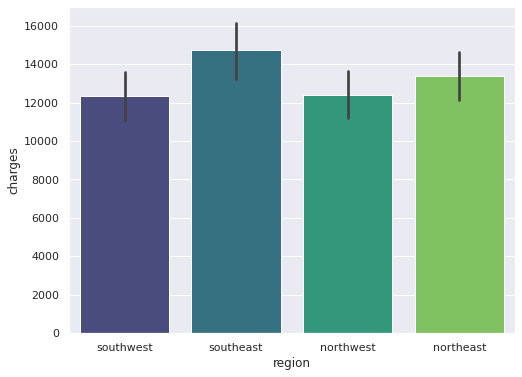

In [7]:
sns.set(rc={"figure.figsize":(8,6)})
sns.barplot(x='region', y='charges', data=data, palette='viridis')

Dari data visual diatas, terlihat bahwa mereka yang tinggal di southeast memiliki biaya asuransi yang tinggi

#### Hubungan banyak anak dengan biaya asuransi

<AxesSubplot:xlabel='children', ylabel='charges'>

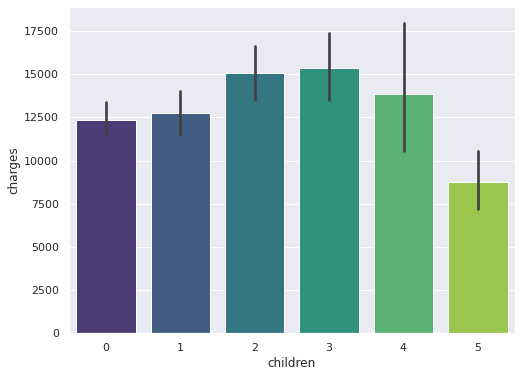

In [8]:
sns.set(rc={"figure.figsize":(8,6)})
sns.barplot(x='children', y='charges', data=data, palette='viridis')

Dari data visual diatas, terlihat data yang agak menarik.
Biaya asuransi terendah ada pada kelompok keluarga yang memiliki anak terbanyak (5)

#### Hubungan penerima asuransi yang memiliki anak atau tidak dengan biaya asuransi

<AxesSubplot:xlabel='have_children', ylabel='charges'>

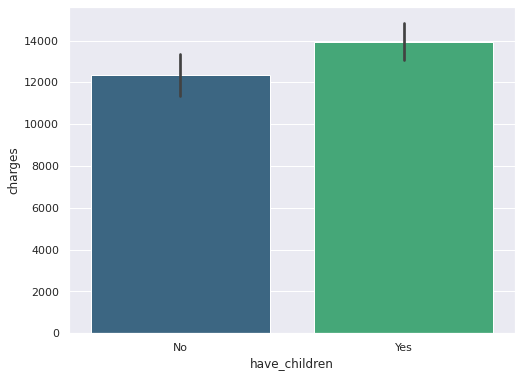

In [9]:
sns.set(rc={"figure.figsize":(8,6)})
sns.barplot(x='have_children', y='charges', data=data, palette='viridis')

Dari data visual diatas, terlihat bahwa biaya asuransi rendah ketika keluarga tidak memiliki anak.

#### Hubungan rentang usia penerima asuransi dengan biaya asuransi

<AxesSubplot:xlabel='age_range', ylabel='charges'>

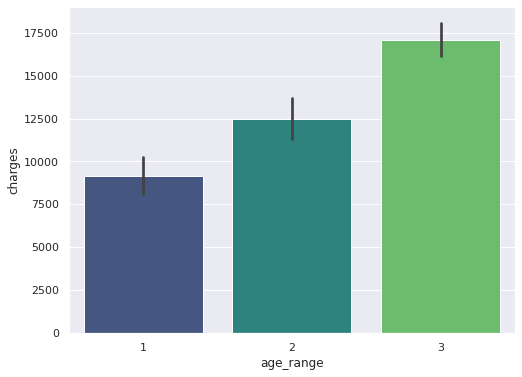

In [10]:
sns.set(rc={"figure.figsize":(8,6)})
sns.barplot(x='age_range', y='charges', data=data, palette='viridis')

Dari data visual diatas, terlihat bahwa usia >= 45 tahun lebih banyak menggunakan asuransi.

#### Hubungan penerima asuransi yang merokok atau tidak merokok dengan biaya asuransi

<AxesSubplot:xlabel='smoker', ylabel='charges'>

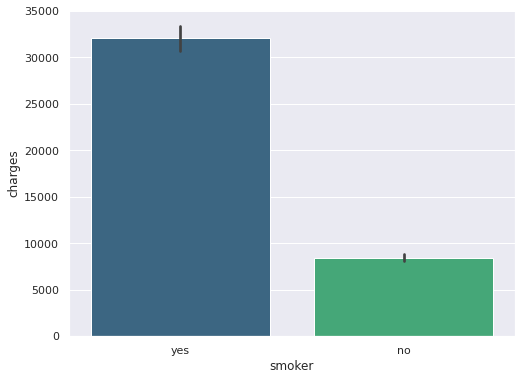

In [11]:
sns.set(rc={"figure.figsize":(8,6)})
sns.barplot(x='smoker', y='charges', data=data, palette='viridis')

Dari data visual diatas, terlihat bahwa biaya asuransi rendah ketika penerima asuransi tidak merokok.

In [12]:
report_pp = data.profile_report(progress_bar=False, title='Insurance Data - Report')

# saving the report
report_pp.to_file(output_file='Insurance Data - Report.html')
report_pp

Berdasarkan hasil korelasi diatas, dapat ditentukan tidak akan menggunakan fitur sex dan age untuk variable input (x) terhadap variable output (y). Alasan tidak menggunakan variable age karena umur sudah dikelompokkan menjadi beberapa range.

## Data Preprocessing

In [13]:
data.head(100)

,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,female,27.900,0,yes,southwest,16884.92400,1,No
1,18,male,33.770,1,no,southeast,1725.55230,1,Yes
2,28,male,33.000,3,no,southeast,4449.46200,1,Yes
3,33,male,22.705,0,no,northwest,21984.47061,2,No
4,32,male,28.880,0,no,northwest,3866.85520,2,No
...,...,...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380,1,Yes
96,54,female,30.800,3,no,southwest,12105.32000,3,Yes
97,55,male,38.280,0,no,southeast,10226.28420,3,No
98,56,male,19.950,0,yes,northeast,22412.64850,3,No


In [14]:
# Convert data categorical to numeric
object_cols = ['sex', 'smoker', 'region', 'have_children']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head(100)

,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,0,27.900,0,1,3,16884.92400,1,0
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,2,0
4,32,1,28.880,0,0,1,3866.85520,2,0
...,...,...,...,...,...,...,...,...,...
95,28,0,37.620,1,0,2,3766.88380,1,1
96,54,0,30.800,3,0,3,12105.32000,3,1
97,55,1,38.280,0,0,2,10226.28420,3,0
98,56,1,19.950,0,1,0,22412.64850,3,0


<AxesSubplot:>

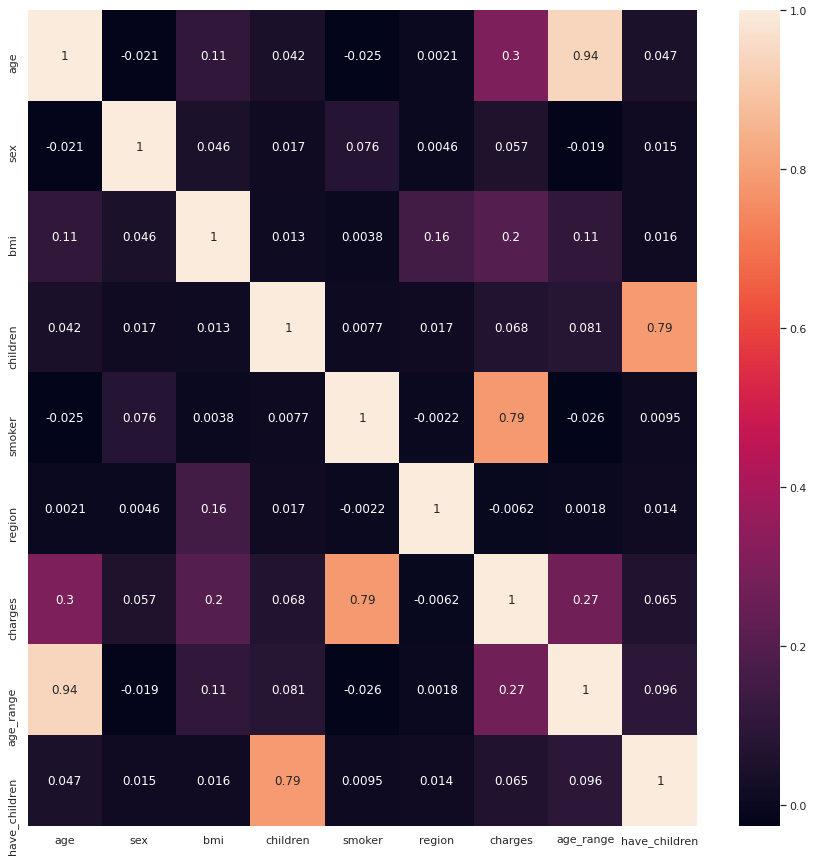

In [15]:
sns.set(rc={"figure.figsize":(15,15)})
sns.heatmap(data.corr(),annot=True) #looking at correlation values

Dari data visual diatas, dapat dilihat bahwa korelasi linier dengan variabel perokok cukup tinggi dan variabel jenis kelamin cukup rendah. Jadi variabel jenis kelamin harus dihilangkan untuk menguji model.

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,0,27.900,0,1,3,16884.92400,1,0
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,2,0
4,32,1,28.880,0,0,1,3866.85520,2,0


In [17]:
# Seperating Features and Target
X = data.drop(columns=["charges","sex","age"])
y = data['charges']

In [18]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [19]:
result_models = []

#### Logistic Regression

In [20]:
#Using Linear Regression

LinR = LinearRegression()
LinR.fit(X_train, y_train)

score = LinR.score(X_train, y_train)
print('Coefficient of Determination :', score)
testError = np.sqrt(mean_squared_error(y_test, LinR.predict(X_test)))
print(testError)

result_models.append({'Model Name': 'Linear Regression',
                      'Coefficient of Determination': score,
                      'Test Error': testError})

Coefficient of Determination : 0.7472899726708728
6501.903022166118


In [21]:
#Using KNeighbors Regression

KnR = KNeighborsRegressor()
KnR.fit(X_train, y_train)

score = KnR.score(X_train, y_train)
print('Coefficient of Determination :', score)
testError = np.sqrt(mean_squared_error(y_test, KnR.predict(X_test)))
print(testError)

result_models.append({'Model Name': 'KNeighbors Regression',
                      'Coefficient of Determination': score,
                      'Test Error': testError})

Coefficient of Determination : 0.6184834750813791
9272.179867331437


In [22]:
#Using Support Vector Regression (SVR)

SvR = SVR(kernel='linear')
SvR.fit(X_train, y_train)

score = SvR.score(X_train, y_train)
print('Coefficient of Determination :', score)
testError = np.sqrt(mean_squared_error(y_test, SvR.predict(X_test)))
print(testError)

result_models.append({'Model Name': 'Support Vector Regression',
                      'Coefficient of Determination': score,
                      'Test Error': testError})

Coefficient of Determination : -0.07074835758742792
12384.645108764324


In [23]:
#Using Decision Tree Regression

DtR = DecisionTreeRegressor()
DtR.fit(X_train, y_train)

score = DtR.score(X_train, y_train)
print('Coefficient of Determination :', score)
testError = np.sqrt(mean_squared_error(y_test, DtR.predict(X_test)))
print(testError)

result_models.append({'Model Name': 'Decision Tree Regression',
                      'Coefficient of Determination': score,
                      'Test Error': testError})

Coefficient of Determination : 0.9956729525047429
6315.038762493888


In [24]:
#Using Random Forest Regression

RfR = RandomForestRegressor()
RfR.fit(X_train, y_train)

score = RfR.score(X_train, y_train)
print('Coefficient of Determination :', score)
testError = np.sqrt(mean_squared_error(y_test, RfR.predict(X_test)))
print(testError)

result_models.append({'Model Name': 'Random Forest Regression',
                      'Coefficient of Determination': score,
                      'Test Error': testError})

Coefficient of Determination : 0.9739390485787278
5338.662625343934


In [25]:
result_models = pd.DataFrame(result_models)
result_models

,Model Name,Coefficient of Determination,Test Error
0,Linear Regression,0.747290,6501.903022
1,KNeighbors Regression,0.618483,9272.179867
2,Support Vector Regression,-0.070748,12384.645109
3,Decision Tree Regression,0.995673,6315.038762
4,Random Forest Regression,0.973939,5338.662625


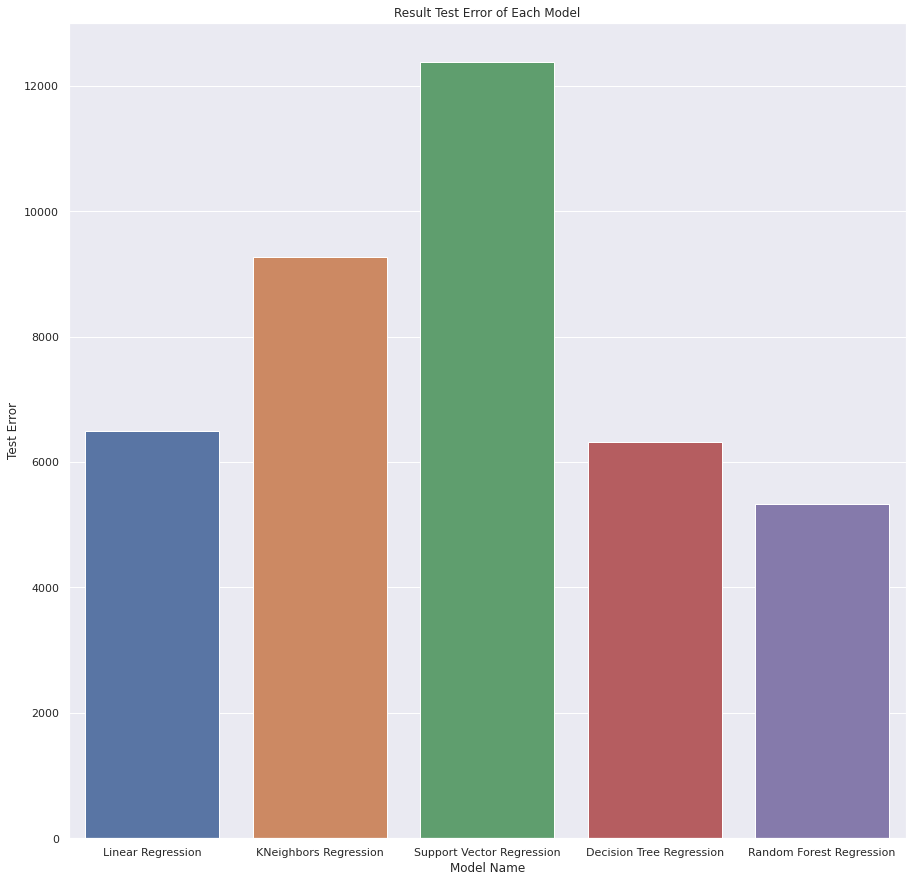

In [26]:
plt.subplots(figsize=(15,15))
sns.barplot(x='Model Name', y='Test Error', data=result_models)
plt.title('Result Test Error of Each Model')
plt.show()

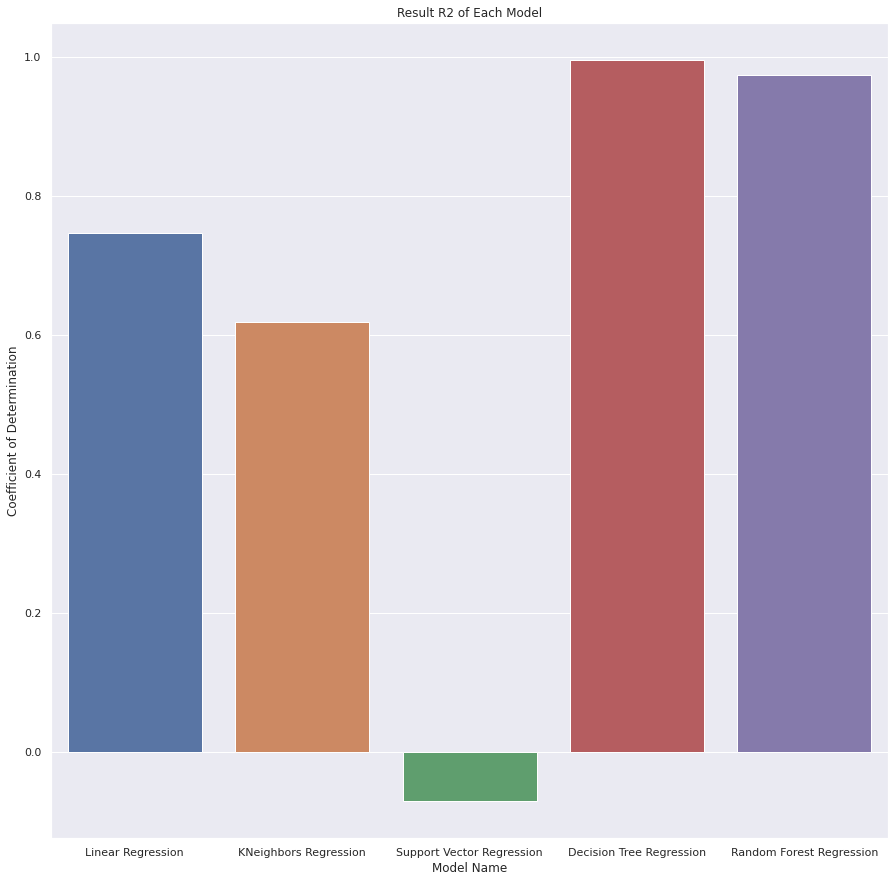

In [27]:
plt.subplots(figsize=(15,15))
sns.barplot(x='Model Name', y='Coefficient of Determination', data=result_models)
plt.title('Result R2 of Each Model')
plt.show()

Berdasarkan data diatas, maka Random Forest Regression adalah Algoritma yang dipilih untuk membuat Model karena memiliki tingkat test error terendah dan R2 nya mendekati angka 1 dibandingkan dengan Algoritma yang lain. 

## Model Saving

In [28]:
pickle.dump(RfR, open('FinalProjectDeployment/model/model_regressier.pkl','wb'))
pickle.dump(RfR, open('model_regressier.pkl','wb'))

In [29]:
model = pickle.load(open('FinalProjectDeployment/model/model_regressier.pkl', 'rb'))

In [30]:
#  0   age            1338 non-null   int64  
#  2   bmi            1338 non-null   float64
#  3   children       1338 non-null   int64  
#  4   smoker         1338 non-null   object 
#  5   region         1338 non-null   object 
#  7   age_range      1338 non-null   int64  
#  8   have_children  1338 non-null   object 

In [31]:
model.predict(np.array([[30.97,1,0,3,1,1]]))

array([6861.585968])

## Conclusion

Berdasarkan data korelasi & hasil pemodelan diatas, dapat disimpulkan bahwa fitur smoker dan age_range sangat mempengaruhi variabel biaya asuransi (charges).